In [49]:
import cv2
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [50]:
image = cv2.imread('image1.jpg')
image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
image.shape

(1920, 1440, 3)

In [51]:
prev_size = image.size

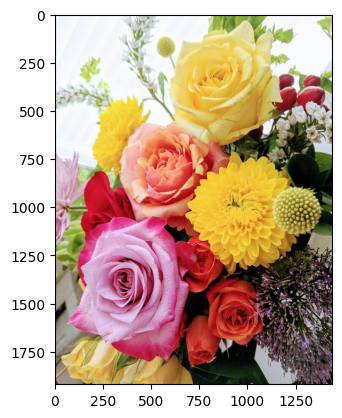

In [52]:
plt.imshow(image)

In [53]:
r , g , b = cv2.split(image)
r , g , b = r/255 , g/255 , b/255

In [54]:
components = 100
pca_r = PCA(n_components=components)
reduced_r = pca_r.fit_transform(r)

pca_g = PCA(n_components=components)
reduced_g = pca_g.fit_transform(g)

pca_b = PCA(n_components=components)
reduced_b = pca_b.fit_transform(b)

In [55]:
combined = np.array([reduced_r , reduced_g , reduced_b])
compressed_size = combined.size

In [56]:
reconstructed_r = pca_r.inverse_transform(reduced_r)
reconstructed_g = pca_g.inverse_transform(reduced_g)
reconstructed_b = pca_b.inverse_transform(reduced_b)

In [57]:
reconstructed_image = cv2.merge((reconstructed_r , reconstructed_g , reconstructed_b))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


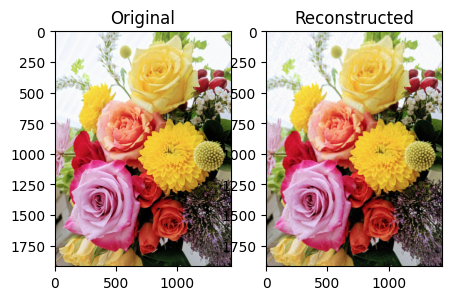

In [69]:
fig = plt.figure(figsize=(5, 5))

fig.add_subplot(1, 2, 1)
plt.title('Original')
plt.imshow(image)

fig.add_subplot(1, 2, 2)
plt.title('Reconstructed')
plt.imshow(reconstructed_image)

In [61]:
print(f"Total compression = {(prev_size - compressed_size)/prev_size} % ")

Total compression = 0.9305555555555556 % 
